# Naive Bayes Gaussiana

El teorema de Bayes, dicta que los datos se organicen por <strong>condicionales estadísticos</strong>, comparando a nivel porcentual la probabilidad de que ocurra una situación u otra. Acá un ejemplo:

<table border="1" cellspacing="0" cellpadding="5">
  <tr style="font-weight: bold;">
    <td colspan="3" align="center">Tabla de Frecuencia</td>
  </tr>
  <tr style="font-weight: bold;">
    <td>Clima</td>
    <td colspan="2" align="center">Jugar Golf</td>
  </tr>
  <tr style="font-weight: bold;">
    <td></td>
    <td>Sí</td>
    <td>No</td>
  </tr>
  <tr>
    <td>Soleado</td>
    <td>3</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Nublado</td>
    <td>4</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Lluvioso</td>
    <td>3</td>
    <td>2</td>
  </tr>
</table>
<br>

<table border="1" cellspacing="0" cellpadding="5">
  <tr style="font-weight: bold;">
    <td colspan="4" align="center">Tabla de Verosimilitud</td>
  </tr>
  <tr style="font-weight: bold;">
    <td>Clima</td>
    <td>Sí</td>
    <td>No</td>
    <td>Total</td>
  </tr>
  <tr>
    <td style="font-weight: bold;">Soleado</td>
    <td>3/10</td>
    <td>2/4</td>
    <td style="font-weight: bold;">5/14</td>
  </tr>
  <tr>
    <td style="font-weight: bold;">Nublado</td>
    <td>4/10</td>
    <td>0/4</td>
    <td style="font-weight: bold;">4/14</td>
  </tr>
  <tr>
    <td style="font-weight: bold;">Lluvioso</td>
    <td>3/10</td>
    <td>2/4</td>
    <td style="font-weight: bold;">5/14</td>
  </tr>
  <tr style="font-weight: bold;">
    <td>Total</td>
    <td>10/14</td>
    <td>4/14</td>
    <td></td>
  </tr>
</table>
<br>

<div style="font-family: monospace; padding: 10px;">
  1) P(Sí | Soleado) = P(Soleado | Sí) * P(Sí) / P(Soleado)<br>
  2) P(Soleado | Sí) = 3/10 = 0.3, P(Soleado) = 5/14 = 0.36, P(Sí) = 10/14 = 0.64<br>
  3) P(Sí | Soleado) = 0.33 * 0.64 / 0.36 = 0.60 → 60% (mayor probabilidad)
</div>


In [24]:
"""
Para el naive bayes se usará la estandarización Gaussiana
directamente de sklearn, lo que se usará mayormente en
situaciones reales.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Esta es la importación del tema actual
from sklearn.naive_bayes import GaussianNB


In [25]:
# Asignación de dataset
iris = datasets.load_iris()
x = iris.data[:,[2,3]] #type:ignore
y = iris.target #type:ignore

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=7)

In [27]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)


In [28]:
nb = GaussianNB()
nb.fit(x_train_sc, y_train)

,priors,None
,var_smoothing,1e-09


In [29]:
print(f"Precisión:\n{accuracy_score(y_test, nb.predict(x_test_sc))}\n\nMatriz de Confusión:\n{confusion_matrix(y_test, nb.predict(x_test_sc))}\n\nReporte:\n{classification_report(y_test, nb.predict(x_test_sc))}")

Precisión:
0.8947368421052632

Matriz de Confusión:
[[11  0  0]
 [ 0 12  2]
 [ 0  2 11]]

Reporte:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      0.86      0.86        14
           2       0.85      0.85      0.85        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.89      0.89      0.89        38



In [30]:
# Cruzar los valores del dataset
cvs = cross_val_score(nb, iris.data, iris.target, scoring="accuracy", cv=10) #type:ignore
print(f"Precisión (General):\n{cvs}\n\nPrecisión (promedio):\n{cvs.mean()}")

Precisión (General):
[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]

Precisión (promedio):
0.9533333333333334


## Graficar Fronteras de Decisión

In [32]:
x_combined = np.vstack((x_train_sc, x_test_sc))
y_combined = np.hstack((y_train, y_test))

In [33]:
# Rango de datos
x_min, x_max = x_combined[:,0].min() -1, x_combined[:,0].max() +1
y_min, y_max = x_combined[:,1].min() -1, x_combined[:,1].max() +1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100),
)

In [34]:
z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

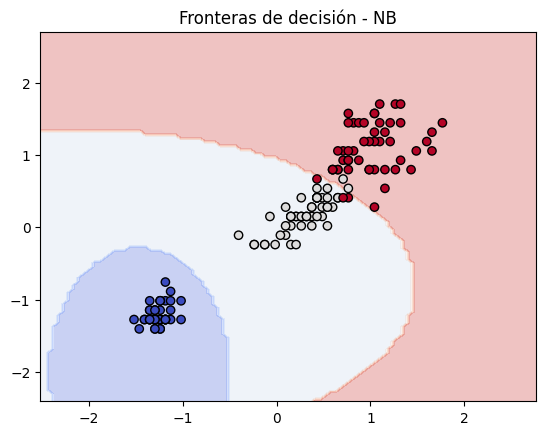

In [36]:
plt.contourf(xx, yy, z, alpha=.3, cmap="coolwarm")
plt.scatter(x_combined[:,0], x_combined[:,1], c=y_combined, edgecolors="k", cmap="coolwarm")
plt.title("Fronteras de decisión - NB")
plt.show()